<a href="https://colab.research.google.com/github/tduong02/project/blob/main/PTHTTT_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


nhập thư viện

In [ ]:
# Standard libraries for Data Analysis
import pandas as pd
import numpy as np

# Standard libraries for Data Visualization
import matplotlib.pyplot as plt

# sklearn modules for Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# sklearn modules for Model Selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

# sklearn metrics for Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Handle warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/motorbike.xlsx')

**Data mining**

In [ ]:
# Review randomly 5 rows of the dataset
df.head(5)

,Tên xe,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Số Km đã đi (chỉ cần ghi số),Năm đăng ký,Giá (vnđ) (chỉ cần ghi số),Trích nguồn
0,hoanda sh mode,Mới,Honda,Vàng,Xe số,100 - 175 cc,0,NaN,23000000,https://xe.chotot.com/?_ga=2.1696479667105.102...
1,DREAM BOSS,Đã Sử Dụng,Sanda,Đen,Xe số,50 - 100 cc,23456,2013,9800000,https://xe.chotot.com/mua-ban-xe-may-quan-ninh...
2,BOSS,Đã Sử Dụng,Sanda,Đen,Xe số,100 - 175 cc,16868,2007,6300000,https://xe.chotot.com/mua-ban-xe-may-quan-go-v...
3,DREAM BOSS,Đã Sử Dụng,Sanda,Đen,Xe số,50 - 100 cc,56282,2006,4600000,https://xe.chotot.com/mua-ban-xe-may-quan-12-t...
4,DREAM BOSS,Đã Sử Dụng,Sanda,Đen,Xe số,100 - 175 cc,25000,2002,4900000,https://xe.chotot.com/mua-ban-xe-may-thanh-pho...


In [ ]:
df.rename(columns={
    'Số Km đã đi (chỉ cần ghi số)': 'Tổng dặm đã đi (Km)',
    'Giá (vnđ) (chỉ cần ghi số)': 'Giá (VNĐ)'
}, inplace=True)

In [ ]:
# Check the shape of the dataset (rows and columns)
total_rows, total_col = df.shape
print('Data:', total_rows)
print('Features:', total_col)

Data: 1499
Features: 10


In [ ]:
# Show brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tên xe               1499 non-null   object
 1   Tình trạng           1499 non-null   object
 2   Hãng xe              1499 non-null   object
 3   Màu sắc              1499 non-null   object
 4   Loại xe              1499 non-null   object
 5   Dung tích xe         1499 non-null   object
 6   Tổng dặm đã đi (Km)  1499 non-null   object
 7   Năm đăng ký          1497 non-null   object
 8   Giá (VNĐ)            1499 non-null   int64 
 9   Trích nguồn          1499 non-null   object
dtypes: int64(1), object(9)
memory usage: 117.2+ KB


In [ ]:
# Check null values
df.isnull().sum()

Tên xe                 0
Tình trạng             0
Hãng xe                0
Màu sắc                0
Loại xe                0
Dung tích xe           0
Tổng dặm đã đi (Km)    0
Năm đăng ký            2
Giá (VNĐ)              0
Trích nguồn            0
dtype: int64

Dataset chỉ có 2 missing value đối với feature "Năm đăng ký", lát sẽ xử lí ở phần làm sạch dl

In [ ]:
# Check duplicated values
df.duplicated().sum()

13

In [ ]:
# Remove duplicated data to handle redundancy
df.drop_duplicates(inplace=True)

# Check if duplicates have been removed (should be 0)
duplicates_after_removal = df.duplicated().sum()
print('Duplicates after removal:', duplicates_after_removal)
print('Total Rows after Removal:', df.shape[0])

Duplicates after removal: 0
Total Rows after Removal: 1486


Dùng hàm unique để kiểm tra giá trị khác nhau của từng feature

In [ ]:
df['Tình trạng'].unique()

array(['Mới', 'Đã Sử Dụng'], dtype=object)

In [ ]:
df['Hãng xe'].unique()

array(['Honda', 'Sanda', 'Suzuki', 'SYM', 'Taya', 'Triumph', 'Ducati',
       'Moto Guzzi', 'MV Agusta', 'Aprilia', 'Nioshima', 'Peugeot',
       'Piaggio', 'Bazan', 'Hyosung', 'Kawasaki', 'KTM', 'Keeway',
       'Kengo', 'Kymco', 'RebelUSA', 'Royal Enfield', 'Regal Raptor',
       'Benelli', 'Daelim', 'Vento', 'Victory', 'Visitor', 'Detech',
       'Khác', 'Euro Reibel', 'GPX', 'Harley Davidson', 'Yamaha', 'BMW',
       'CR&S', 'Dibao', 'Halim', 'Brixton'], dtype=object)

In [ ]:
df['Hãng xe'].nunique()

39

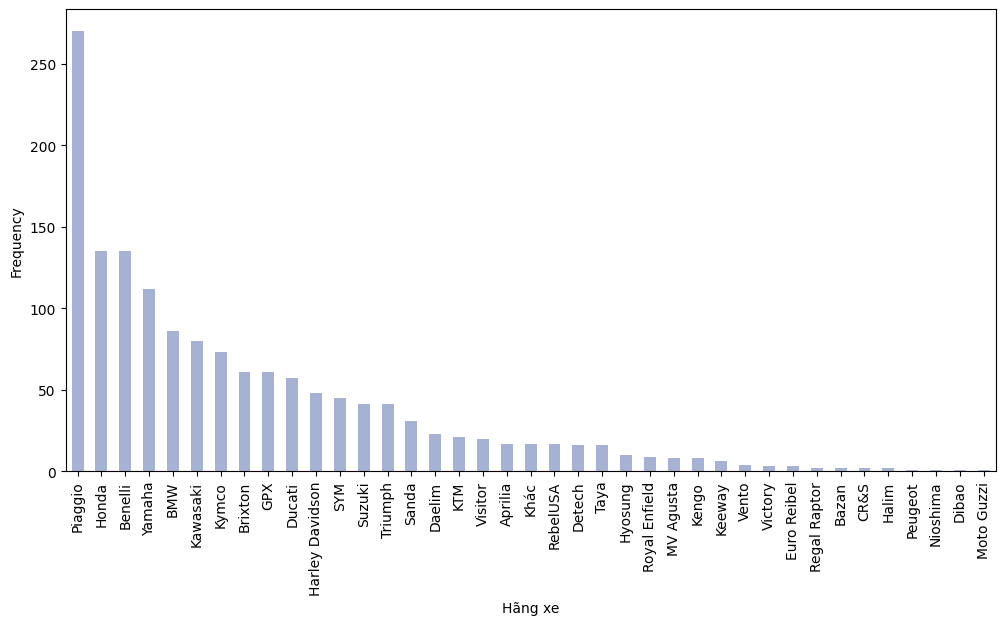

In [ ]:
df['Hãng xe'].value_counts().plot.bar(figsize=(12, 6), color='#A5B2D3')
plt.xlabel('Hãng xe')
plt.ylabel('Frequency')
plt.show()

Có **38** hãng xe được liệt kê cụ thể và 1 giá trị "Khác" (khả năng là tổng hợp những xe đến từ các hãng khác). Trong đó có **hãng Piaggio** chiếm số lượng rất nhiều trong dataset, mặt khác có một số hãng xe chiếm rất ít.

In [ ]:
df['Màu sắc'].unique()

array(['Vàng', 'Đen', 'Đỏ', 'Trắng', 'Xanh Dương', 'Ghi', 'Nâu', 'Khác',
       'Xanh Lá Cây', 'Cam', 'Hồng', 'Tím'], dtype=object)

In [ ]:
df['Loại xe'].unique()

array(['Xe số', 'Tay côn/moto', 'Xe ga'], dtype=object)

In [ ]:
df['Dung tích xe'].unique()

array(['100 - 175 cc', '50 - 100 cc', 'Không biết rõ', 'Dưới 50 cc',
       'Trên 175 cc'], dtype=object)

In [ ]:
df['Tổng dặm đã đi (Km)'].unique()

array([0, 23456, 16868, 56282, 25000, 214704, 9999, 50000, 3456, 54454,
       33, 20, 12345, 123, 2000, 15000, 30000, 4000, 1, 2538, 15, 66666,
       120000, 10000, 20000, 38, 2400, 2500, 123456, 628719, 27000, 5,
       9000, 1000, 18000, 3333, 5000, 10, 60000, 25040, 1234, 444444,
       2100, 39000, 6000, 80000, 399, 23000, 587425, 24000, 12, 134613,
       23465, 140000, 8000, 56847, 52800, 2300, 124342, 7000, 87, 2024,
       12000, 18765, 495, 23234, 43000, 19000, 26000, 21000, 22000, 31000,
       5200, 13000, 54000, 64800, 3000, 11000, 1500, 35000, 16200, 300,
       90000, 15274, 37300, 150000, 2021, 4135, 50, 842, 39, 500000,
       14659, 40000, 100000, 99999, 2103, 3012, 45000, 3200, 36000, 18600,
       8598, 350000, 500, 3400, 1280, 88888, 6789, 17000, 920, 3500,
       16000, 14000, 7400, 1200, 49000, 41000, 2900, 800, 9200, 12453,
       8512, 600, 23669, 2200, 70000, 7, 58000, 32693, 80247, 16252, 9800,
       13456, 6500, 5900, 29000, 1600, 14666, 13379, 400, 3900, 

Đối với feature "Tổng dặm đã đi (Km)", dữ liệu bị lỗi ở chỗ "Euro Reibel", "BMW S1000R". Ngoài ra, mặc dù dữ liệu là số, cần chú ý đến một số giá trị như: 174800000, 27500000, 174800000, vì nếu là quãng đường thì một xe như này là đi quá nhiều, hoặc do bị lỗi, hoặc nghi vấn là trong lúc thu thập dữ liệu thì ghi nhầm cột giá vào đây.

In [ ]:
df['Năm đăng ký'].unique()

array([nan, 2013, 2007, 2006, 2002, 2010, 2004, 2005, 2008, 2019, 2009,
       2011, 1999, 2016, 2001, 2020, 2003, 2012, 1997, 2000, 2015, 2021,
       2014, 1998, 2023, 2018, 1995, 2022, 2017, 'Trước năm 1980', 1989,
       1986, 10000, 1996, ' trước năm 1980', 20202, 1993, 1992],
      dtype=object)

Đối với feature "Năm đăng ký", dữ liệu có một số điểm cần xử lý như trường hợp **'nan'** (ko phải 1 số), **'10000'**, **'20202'**, **'Trước năm 1980'**, **' trước năm 1980'**.

In [ ]:
df['Giá (VNĐ)'].unique()

array([  23000000,    9800000,    6300000,    4600000,    4900000,
          5200000,    5300000,    6500000,    5500000,    5700000,
         10500000,    6200000,    4000000,    4200000,    8900000,
          2700000,    4500000,    8300000,    6800000,    7000000,
          9500000,    4570000,    6600000,   11000000,   13000000,
          3700000,   19990000,    8500000,   26500000,   62000000,
        170000000,   14000000,   16000000,   19800000,   29900000,
         24000000,  380000000,   26000000,   21500000,   73000000,
         20500000,    3200000,  320000000,   35000000,    3500000,
         78000000,    5900000,   30500000,    3100000,  259000000,
        265000000,  190000000,    2000000,    7900000,   26800000,
         15000000,    4300000,    7500000,   27900000,    3000000,
          2800000,   27000000,   52500000,    6000000,   12000000,
         11900000,    9400000,    7200000,  175000000,   13500000,
         12500000,  286000000,    5000000,    1200000,   85000

Đối với feature "Giá (VNĐ), nhận thấy cũng có một số dữ liệu bất thường cần được xử lý như **những xe có giá nhỏ hơn 1000000**, những mức giá bất thường như **12345678**, **111233**, **5555555**, **38888888**, **29888888**...

**Processing, Cleaning data**

In [ ]:
# Create a copy so that any changes in the copy do not affect the original dataset.
new_motorbike = df.copy()

Trước hết, mình sẽ bỏ 2 features là "Tên xe" và "Trích nguồn" vì mỗi mẫu xe sẽ có cách đặt tên và nguồn hàng khác nhau nên không có ích cho mô hình sau này.

In [ ]:
# Remove unnecessary columns
new_motorbike = new_motorbike.drop(columns = ['Tên xe','Trích nguồn'])
new_motorbike.head()

,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ)
0,Mới,Honda,Vàng,Xe số,100 - 175 cc,0,NaN,23000000
1,Đã Sử Dụng,Sanda,Đen,Xe số,50 - 100 cc,23456,2013,9800000
2,Đã Sử Dụng,Sanda,Đen,Xe số,100 - 175 cc,16868,2007,6300000
3,Đã Sử Dụng,Sanda,Đen,Xe số,50 - 100 cc,56282,2006,4600000
4,Đã Sử Dụng,Sanda,Đen,Xe số,100 - 175 cc,25000,2002,4900000


In [ ]:
new_motorbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1498
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tình trạng           1486 non-null   object
 1   Hãng xe              1486 non-null   object
 2   Màu sắc              1486 non-null   object
 3   Loại xe              1486 non-null   object
 4   Dung tích xe         1486 non-null   object
 5   Tổng dặm đã đi (Km)  1486 non-null   object
 6   Năm đăng ký          1484 non-null   object
 7   Giá (VNĐ)            1486 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 104.5+ KB


Ở phần khám phá dữ liệu, nhận thấy các feature "Tổng số dặm đi (km)" và "Năm đăng ký" hiển thị kết quả phần lớn là số, tuy nhiên có một số dòng có dữ liệu bất thường ví dụ dữ liệu là chữ, số quá lớn, hoặc là giá trị null, nên mình sẽ kiểm tra lại dữ liệu và thực hiện làm sạch trước (nếu cần thiết).

**Column "Tổng dặm đã đi (Km)"**

In [ ]:
# Check to see if the data in this column is numeric or not?
non_numeric_rows = new_motorbike[~new_motorbike['Tổng dặm đã đi (Km)'].astype(str).str.isdigit()]
non_numeric_rows

,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ)
442,Đã Sử Dụng,Regal Raptor,Đen,Tay côn/moto,100 - 175 cc,Euro Reibel,2022,12345678
1045,Đã Sử Dụng,BMW,Trắng,Tay côn/moto,Trên 175 cc,BMW S1000R,2021,389000000


In [ ]:
# Keep only rows where the column contains digit values
new_motorbike = new_motorbike[new_motorbike['Tổng dặm đã đi (Km)'].astype(str).str.isdigit()]

In [ ]:
new_motorbike.shape

(1484, 8)

In [ ]:
# Convert the 'Tổng dặm đã đi (Km)' column to the integer data type
new_motorbike['Tổng dặm đã đi (Km)'] = new_motorbike['Tổng dặm đã đi (Km)'].astype(int)

<ipython-input-27-c23405914e54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_motorbike['Tổng dặm đã đi (Km)'] = new_motorbike['Tổng dặm đã đi (Km)'].astype(int)


**Column "Năm đăng ký"**

In [ ]:
new_motorbike['Năm đăng ký'].value_counts()

2019               169
2020               160
2022               135
2018               135
2021               102
2016                96
2012                95
2017                95
2015                82
2023                77
2014                67
2010                58
2013                52
2011                41
2008                26
2009                19
2007                 9
2006                 9
2001                 6
2005                 6
1997                 6
2002                 6
2000                 4
2003                 4
1999                 4
2004                 4
1998                 3
1995                 3
Trước năm 1980       1
1989                 1
1986                 1
10000                1
1996                 1
 trước năm 1980      1
20202                1
1993                 1
1992                 1
Name: Năm đăng ký, dtype: int64

In [ ]:
# Filter out rows containing missing values
new_motorbike[new_motorbike['Năm đăng ký'].isna()]

,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ)
0,Mới,Honda,Vàng,Xe số,100 - 175 cc,0,NaN,23000000
1228,Mới,Aprilia,Khác,Xe ga,100 - 175 cc,0,NaN,99500000


In [ ]:
# Filter out lines containing 10000 and 20202
new_motorbike[new_motorbike['Năm đăng ký'].isin([10000,20202])]

,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ)
155,Đã Sử Dụng,Taya,Xanh Lá Cây,Xe số,50 - 100 cc,2021,10000,7500000
669,Đã Sử Dụng,Benelli,Xanh Lá Cây,Tay côn/moto,Trên 175 cc,4000,20202,23600000


Một số giá trị bất thường ở cột "Năm đăng ký" cần xử lý như sau:
*   " trước năm 1980", "Trước năm 1980" => đều quy về 1980
*   10000: năm đăng kí bị nhầm với số KM đã đi
*   20202: đưa về 2020
*   Có 2 dòng bị trống dữ liệu, vì 2 xe này đều là xe mới nên sẽ thay vào giá trị nan thành mới nhất là 2023

In [ ]:
new_motorbike['Năm đăng ký'] = new_motorbike['Năm đăng ký'].fillna(2023)

In [ ]:
new_motorbike['Năm đăng ký'] = new_motorbike['Năm đăng ký'].replace({"Trước năm 1980": 1980,
                                                                    " trước năm 1980":1980,
                                                                    10000:2021,
                                                                    20202:2020}).astype(int)

In [ ]:
new_motorbike['Năm đăng ký'].value_counts()

2019    169
2020    161
2022    135
2018    135
2021    103
2016     96
2012     95
2017     95
2015     82
2023     79
2014     67
2010     58
2013     52
2011     41
2008     26
2009     19
2006      9
2007      9
1997      6
2001      6
2002      6
2005      6
2003      4
2000      4
2004      4
1999      4
1995      3
1998      3
1980      2
1989      1
1986      1
1996      1
1993      1
1992      1
Name: Năm đăng ký, dtype: int64

**Column "Giá (VNĐ)"**

Ở phần khám phá dữ liệu, nhận thấy có một số xe có giá < 1 triệu đồng, khá vô lý nên mình nghĩ là dữ liệu có thể bị sai trong lúc nhập, và một số mức giá bất thường khác như 12345678, 5555555, 38888888, 29888888, 29999999,  699666999, 3699999.

In [ ]:
# List of motorbike brands priced under 1 million VND
new_motorbike[new_motorbike['Giá (VNĐ)'] < 1000000]

,Tình trạng,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ)
167,Đã Sử Dụng,Honda,Đen,Tay côn/moto,Trên 175 cc,842,2023,165000
356,Đã Sử Dụng,Kengo,Xanh Dương,Tay côn/moto,Không biết rõ,12000,2019,45000
918,Đã Sử Dụng,Piaggio,Đen,Xe ga,100 - 175 cc,4999,2022,0
1112,Đã Sử Dụng,BMW,Đen,Tay côn/moto,Trên 175 cc,26000,2023,245000
1147,Đã Sử Dụng,BMW,Khác,Tay côn/moto,Trên 175 cc,15000,2020,355000
1182,Đã Sử Dụng,Aprilia,Khác,Xe ga,100 - 175 cc,10000,2023,111233


Từ những giả định trên của mình cho 3 features "Tổng dặm đã đi (Km)", "Năm đăng ký", và "Giá (VNĐ)", nên giờ mình sẽ kiểm tra xem liệu có outlier ở các numeric feautures này hay không, nếu có thì sẽ xử lý các outlier này luôn.

In [ ]:
# Select and retrieve columns of numeric data type from the dataframe
numeric_cols = new_motorbike.select_dtypes(include=np.number)

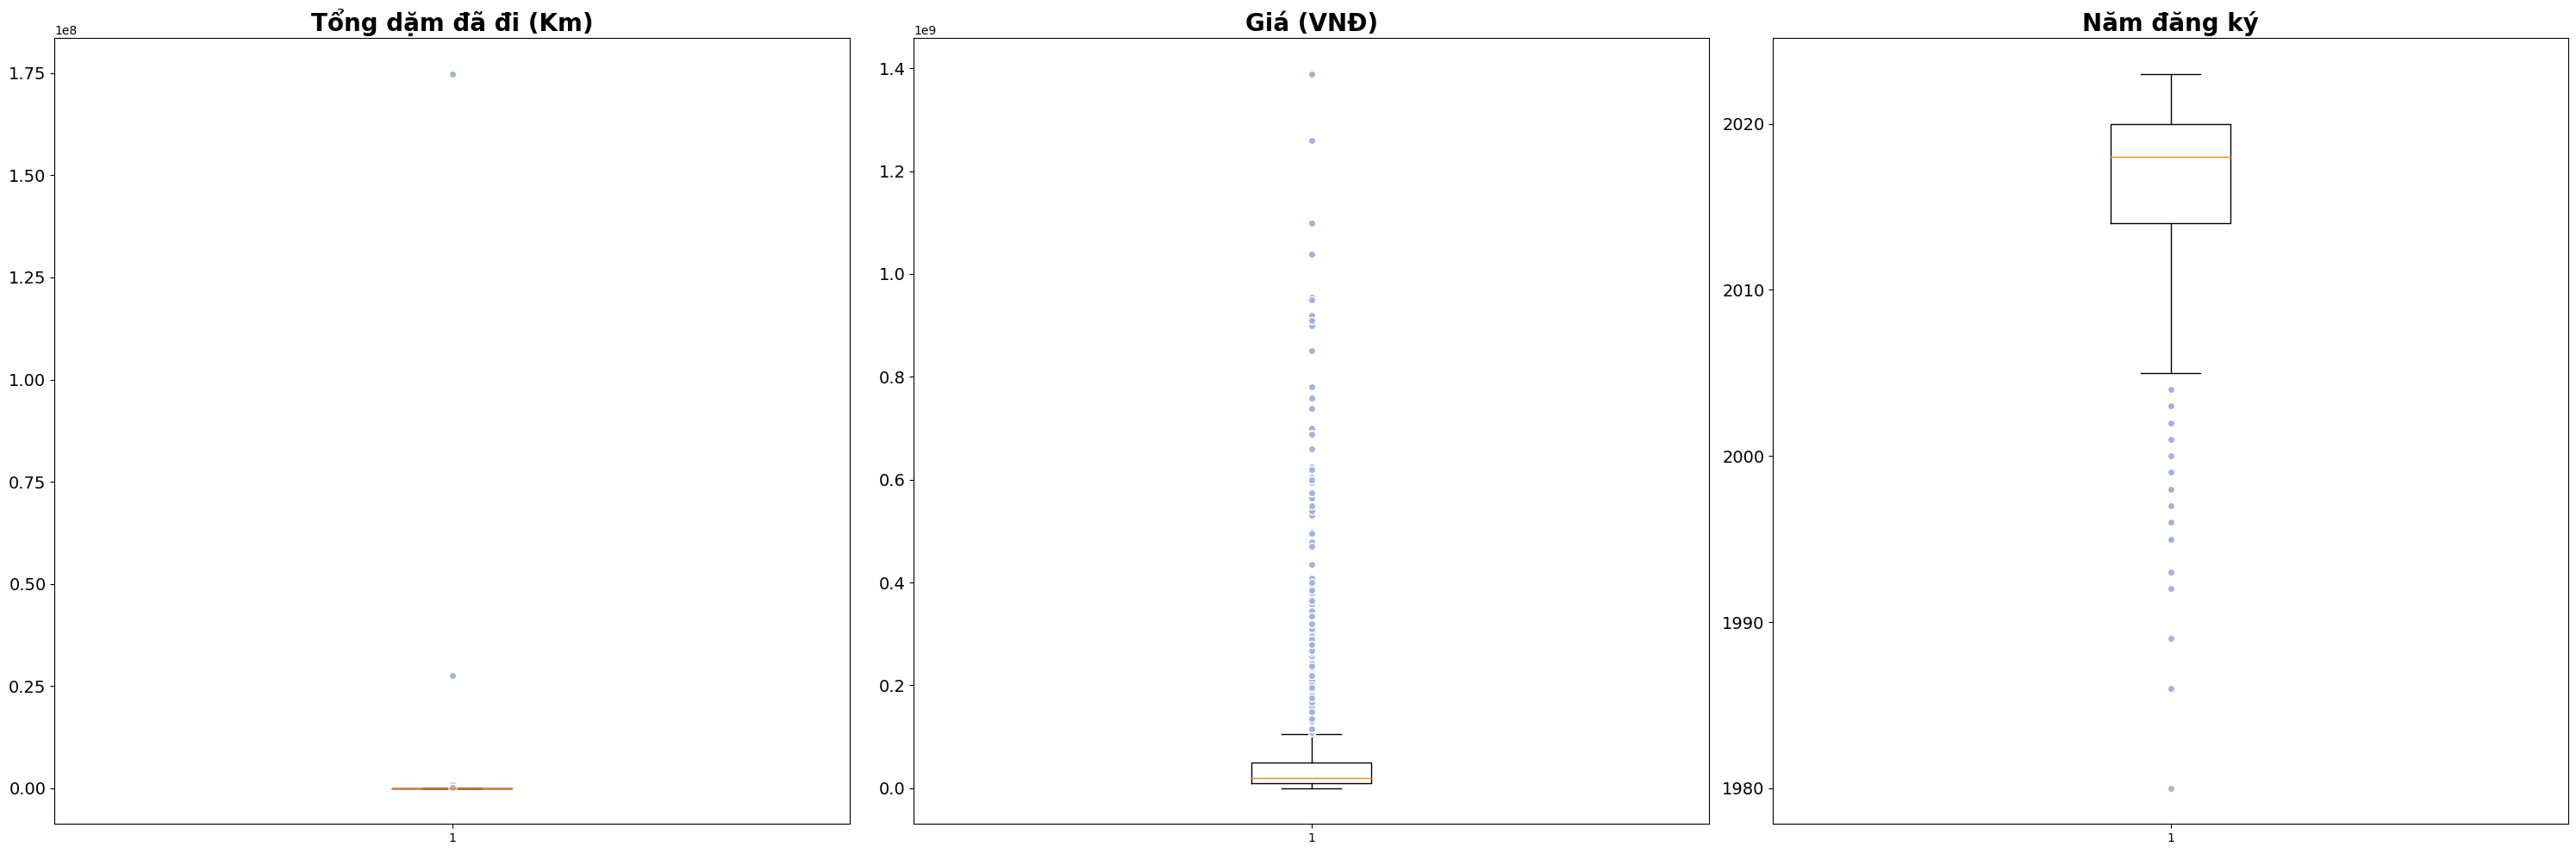

In [ ]:
def plot_boxplots(data, columns, figsize=(30, 10)):
    num_cols = len(columns)
    fig, axs = plt.subplots(1, num_cols, figsize=figsize)

    for i, col in enumerate(columns):
        axs[i].boxplot(data[col], flierprops=dict(markerfacecolor='#A5B2D3', marker='o', markeredgecolor='white'))
        axs[i].set_title(col, fontsize=20, fontweight='bold')
        axs[i].tick_params(axis='y', labelsize=14)

    plt.tight_layout()

numeric_columns = ['Tổng dặm đã đi (Km)', 'Giá (VNĐ)', 'Năm đăng ký']
plot_boxplots(new_motorbike, numeric_columns)
plt.show()

In [ ]:
# Function to count the number of outliers
def outliers(column):
  q1 = new_motorbike[column].quantile(0.25)
  q3 = new_motorbike[column].quantile(0.75)
  iqr =  q3 - q1
  upper_range = q3 + (1.5 * iqr)
  lower_range = q1 - (1.5 * iqr)
  count_outlier = 0
  for i in new_motorbike[column]:
    if i < lower_range or i > upper_range:
      count_outlier += 1
  return count_outlier

for col in numeric_cols:
  print('Outlier from', col,':', outliers(col))

Outlier from Tổng dặm đã đi (Km) : 112
Outlier from Năm đăng ký : 47
Outlier from Giá (VNĐ) : 249


Vậy là có xuất hiện outlier ở đây, cần phải xử lý các outlier này (có thể sẽ không xử lý được hết hoàn toàn, nhưng sẽ giảm bớt).

In [ ]:
# List of unrealistic values to remove
invalid_prices = [12345678, 5555555, 38888888, 29888888, 29999999, 699666999, 3699999]
# Đây là các giá trị mà mình cho làm bất thường trong array

# Eliminate values below 1 million VND and unrealistic values
new_motorbike = new_motorbike[(new_motorbike['Giá (VNĐ)'] > 1000000) & ~new_motorbike['Giá (VNĐ)'].isin(invalid_prices)]

# Nếu bỏ invalid_prices đi rồi thì để handle outlier cho giá thì dùng
# new_motorbike = new_motorbike[new_motorbike['Giá (VNĐ)'] > 1000000]

In [ ]:
# Outlier from "Tổng dặm đã đi (Km)"
new_motorbike = new_motorbike[new_motorbike['Tổng dặm đã đi (Km)'] < 1000000]

In [ ]:
# Outlier from "Năm đăng ký"
q = new_motorbike['Năm đăng ký'].quantile(0.05)
new_motorbike= new_motorbike[new_motorbike['Năm đăng ký'] > q]

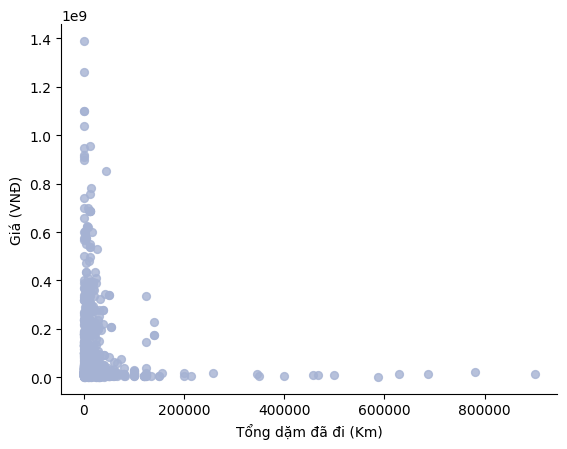

In [ ]:
# Create a scatter plot to visualize the relationship between 'Tổng dặm đã đi (Km)' and 'Giá (VNĐ)'
new_motorbike.plot(kind='scatter', x='Tổng dặm đã đi (Km)', y='Giá (VNĐ)', s=32, alpha=.8, c = '#A5B2D3')
plt.gca().spines[['top', 'right',]].set_visible(False)

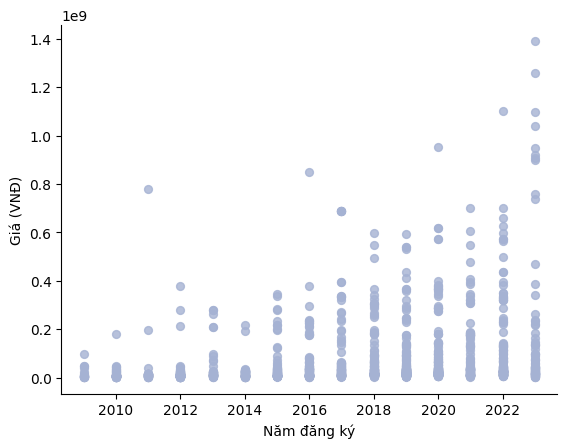

In [ ]:
# Create a scatter plot to visualize the relationship between 'Năm đăng ký' and 'Giá (VNĐ)'
new_motorbike.plot(kind='scatter', x='Năm đăng ký', y='Giá (VNĐ)', s=32, alpha=.8, c = '#A5B2D3')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Column "Tình trạng"**

In [ ]:
# Encode categorical feature 'Tình trạng' using one-hot encoding
new_motorbike = new_motorbike.join(pd.get_dummies(new_motorbike['Tình trạng']))

# Drop the original 'Tình trạng' column since it has been one-hot encoded
new_motorbike = new_motorbike.drop(columns = ['Tình trạng'])
new_motorbike.head()

,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ),Mới,Đã Sử Dụng
0,Honda,Vàng,Xe số,100 - 175 cc,0,2023,23000000,1,0
1,Sanda,Đen,Xe số,50 - 100 cc,23456,2013,9800000,0,1
5,Sanda,Đen,Xe số,100 - 175 cc,214704,2010,5200000,0,1
9,Sanda,Đen,Xe số,100 - 175 cc,3456,2019,5500000,0,1
11,Sanda,Đen,Xe số,50 - 100 cc,33,2009,10500000,0,1


**Column "Hãng xe"**

In [ ]:
# Count the occurrences of each unique value in the 'Hãng xe' column to see the distribution of motorbike brands
new_motorbike['Hãng xe'].value_counts()

Piaggio            258
Benelli            132
Honda              116
Yamaha             106
BMW                 81
Kawasaki            77
Kymco               72
Brixton             60
GPX                 59
Ducati              56
Harley Davidson     48
SYM                 42
Triumph             37
Suzuki              29
KTM                 21
Visitor             20
Khác                17
Detech              16
Sanda               16
RebelUSA            15
Taya                15
Aprilia             14
Daelim              11
Royal Enfield        9
MV Agusta            8
Hyosung              8
Kengo                6
Keeway               4
Euro Reibel          3
Victory              3
Bazan                2
CR&S                 2
Halim                2
Regal Raptor         1
Peugeot              1
Nioshima             1
Vento                1
Dibao                1
Moto Guzzi           1
Name: Hãng xe, dtype: int64

Có một số hãng xe có số lần xuất hiện < 10 trong dataset, do dữ liệu ít cho nên giữ lại các nhãn hiệu có số lượng > 10 và gán nhãn "Khác" cho các hãng xe < 10.

In [ ]:
motor_brand = new_motorbike['Hãng xe'].value_counts()

# Filter and keep only the brands with a quantity greater than or equal to 10
filtered_brand = motor_brand[motor_brand >= 10].index.values
filtered_brand

array(['Piaggio', 'Benelli', 'Honda', 'Yamaha', 'BMW', 'Kawasaki',
       'Kymco', 'Brixton', 'GPX', 'Ducati', 'Harley Davidson', 'SYM',
       'Triumph', 'Suzuki', 'KTM', 'Visitor', 'Khác', 'Detech', 'Sanda',
       'RebelUSA', 'Taya', 'Aprilia', 'Daelim'], dtype=object)

In [ ]:
# Define a function to process motorbike brands
def process_motor_brand(brand_name):
  # If the brand is in the filtered brands, keep it; otherwise, label it as 'Khác'
  if brand_name in filtered_brand:
    return brand_name
  return 'Khác'

# Apply the function to the 'Hãng xe' column to categorize the brands
new_motorbike['Hãng xe'] = new_motorbike['Hãng xe'].apply(process_motor_brand)

new_motorbike['Hãng xe'].value_counts()

Piaggio            258
Benelli            132
Honda              116
Yamaha             106
BMW                 81
Kawasaki            77
Kymco               72
Khác                70
Brixton             60
GPX                 59
Ducati              56
Harley Davidson     48
SYM                 42
Triumph             37
Suzuki              29
KTM                 21
Visitor             20
Sanda               16
Detech              16
RebelUSA            15
Taya                15
Aprilia             14
Daelim              11
Name: Hãng xe, dtype: int64

In [ ]:
# Encode categorical feature 'Hãng xe' using label encoder
le_brand = LabelEncoder()
new_motorbike['Hãng xe'] = le_brand.fit_transform(new_motorbike['Hãng xe'])
new_motorbike.head()

,Hãng xe,Màu sắc,Loại xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ),Mới,Đã Sử Dụng
0,9,Vàng,Xe số,100 - 175 cc,0,2023,23000000,1,0
1,17,Đen,Xe số,50 - 100 cc,23456,2013,9800000,0,1
5,17,Đen,Xe số,100 - 175 cc,214704,2010,5200000,0,1
9,17,Đen,Xe số,100 - 175 cc,3456,2019,5500000,0,1
11,17,Đen,Xe số,50 - 100 cc,33,2009,10500000,0,1


**Column "Màu sắc" và "Loại xe"**

In [ ]:
new_motorbike = new_motorbike.join(pd.get_dummies(new_motorbike['Màu sắc']))
new_motorbike = new_motorbike.join(pd.get_dummies(new_motorbike['Loại xe']))
new_motorbike = new_motorbike.drop(columns = ['Màu sắc', 'Loại xe'])
new_motorbike.head()

,Hãng xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ),Mới,Đã Sử Dụng,Cam,Ghi,Hồng,...,Trắng,Tím,Vàng,Xanh Dương,Xanh Lá Cây,Đen,Đỏ,Tay côn/moto,Xe ga,Xe số
0,9,100 - 175 cc,0,2023,23000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,17,50 - 100 cc,23456,2013,9800000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,17,100 - 175 cc,214704,2010,5200000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,17,100 - 175 cc,3456,2019,5500000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,17,50 - 100 cc,33,2009,10500000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


**Column "Dung tích xe"**

In [ ]:
new_motorbike['Dung tích xe'].value_counts()

100 - 175 cc     767
Trên 175 cc      335
Không biết rõ    135
Dưới 50 cc        84
50 - 100 cc       50
Name: Dung tích xe, dtype: int64

label "Không biết rõ" do chiếm số lượng khá nhiều trong dataset nên sẽ không xử lý nữa mà coi nó là một loại.

In [ ]:
le_capacity = LabelEncoder()
new_motorbike['Dung tích xe'] = le_capacity.fit_transform(new_motorbike['Dung tích xe'])
new_motorbike.head()

,Hãng xe,Dung tích xe,Tổng dặm đã đi (Km),Năm đăng ký,Giá (VNĐ),Mới,Đã Sử Dụng,Cam,Ghi,Hồng,...,Trắng,Tím,Vàng,Xanh Dương,Xanh Lá Cây,Đen,Đỏ,Tay côn/moto,Xe ga,Xe số
0,9,0,0,2023,23000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,17,1,23456,2013,9800000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,17,0,214704,2010,5200000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,17,0,3456,2019,5500000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,17,1,33,2009,10500000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
new_motorbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1498
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Hãng xe              1371 non-null   int64
 1   Dung tích xe         1371 non-null   int64
 2   Tổng dặm đã đi (Km)  1371 non-null   int64
 3   Năm đăng ký          1371 non-null   int64
 4   Giá (VNĐ)            1371 non-null   int64
 5   Mới                  1371 non-null   uint8
 6   Đã Sử Dụng           1371 non-null   uint8
 7   Cam                  1371 non-null   uint8
 8   Ghi                  1371 non-null   uint8
 9   Hồng                 1371 non-null   uint8
 10  Khác                 1371 non-null   uint8
 11  Nâu                  1371 non-null   uint8
 12  Trắng                1371 non-null   uint8
 13  Tím                  1371 non-null   uint8
 14  Vàng                 1371 non-null   uint8
 15  Xanh Dương           1371 non-null   uint8
 16  Xanh Lá Cây          137

**Split training and test set**

In [ ]:
# Define the target variable (y) and features (X)
y = new_motorbike['Giá (VNĐ)'].copy()
X = new_motorbike.drop(columns = ['Giá (VNĐ)']).copy()

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape, X_test.shape

((1096, 21), (275, 21))

**Model training and evaluation**

**DECISION TREE**

In [ ]:
# Hyperparameter grid for Decision Tree
param_grid_dtr = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Decision Tree
grid_search_dtr = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid_dtr,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_dtr.fit(X_scaled, y)
best_dtr_model = grid_search_dtr.best_estimator_

print("Best Decision Tree Hyperparameters:")
print(grid_search_dtr.best_params_)

Best Decision Tree Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Evaluate the best Decision Tree model on the testing set
y_pred_best_dtr = best_dtr_model.predict(X_test)
r2_dtr = r2_score(y_test, y_pred_best_dtr) * 100
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_best_dtr))
mae_dtr = mean_absolute_error(y_test, y_pred_best_dtr)

print("- R-squared:", r2_dtr)
print("- RMSE:", rmse_dtr)
print("- MAE:", mae_dtr)

- R-squared: 73.67526376856344
- RMSE: 68432911.86903444
- MAE: 28675813.327128608


In [ ]:
# Cross-Validation for Decision Tree
dtr_scores = cross_val_score(best_dtr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
dtr_rmse_scores = np.sqrt(-dtr_scores)

print("Decision Tree Cross-Validation RMSE:", dtr_rmse_scores.mean())

Decision Tree Cross-Validation RMSE: 110922871.48881789


**RANDOM FOREST**

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Random Forest
grid_search_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=123), param_grid=param_grid_rfr,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_rfr.fit(X_scaled, y)
best_rfr_model = grid_search_rfr.best_estimator_

print("Best Random Forest Hyperparameters:")
print(grid_search_rfr.best_params_)

Best Random Forest Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Evaluate the best Random Forest model on the testing set
y_pred_best_rfr = best_rfr_model.predict(X_test)
r2_rfr = r2_score(y_test, y_pred_best_rfr) * 100
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_best_rfr))
mae_rfr = mean_absolute_error(y_test, y_pred_best_rfr)

print("- R-squared:", r2_rfr)
print("- RMSE:", rmse_rfr)
print("- MAE:", mae_rfr)

- R-squared: 93.54714631013965
- RMSE: 33881210.22913139
- MAE: 13781466.402785907


In [ ]:
# Cross-Validation for Random Forest
rfr_scores = cross_val_score(best_rfr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rfr_rmse_scores = np.sqrt(-rfr_scores)
print("Random Forest Cross-Validation RMSE:", rfr_rmse_scores.mean())

Random Forest Cross-Validation RMSE: 102227810.09303465


**LINEAR REGRESSION**

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Linear Regression model on the testing set
y_pred_linear_reg = linear_reg_model.predict(X_test)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg) * 100
rmse_linear_reg = np.sqrt(mean_squared_error(y_test, y_pred_linear_reg))
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)

print("- R-squared:", r2_linear_reg)
print("- RMSE:", rmse_linear_reg)
print("- MAE:", mae_linear_reg)

- R-squared: 28.434081257629906
- RMSE: 112832998.94929238
- MAE: 63635315.879842006


In [ ]:
# Cross-Validation for Linear Regression
linear_reg_scores = cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)
print("Linear Regression Cross-Validation RMSE:", linear_reg_rmse_scores.mean())

Linear Regression Cross-Validation RMSE: 112677784.4963131


**GRADIENT BOOSTING**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred_gb = gb_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
r2_gb = r2_score(y_test, y_pred_gb) * 100
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Model Evaluation:")
print("- R-squared:", r2_gb)
print("- RMSE:", rmse_gb)
print("- MAE:", mae_gb)


Gradient Boosting Model Evaluation:
- R-squared: 67.95505108817794
- RMSE: 79597469.18876192
- MAE: 34840989.483635135


In [ ]:
# Cross-Validation for Gradient Boosting
best_gb_model = GradientBoostingRegressor()
gb_scores = cross_val_score(best_gb_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
gb_rmse_scores = np.sqrt(-gb_scores)
print("Gradient Boosting Cross-Validation RMSE:", gb_rmse_scores.mean())

Gradient Boosting Cross-Validation RMSE: 94816788.77491206


**K-NEAREST NEIGHBORS (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Khởi tạo mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Huấn luyện mô hình KNN trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra bằng KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate the best KNN model on the testing set
r2_knn = r2_score(y_test, y_pred_knn) * 100
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("K-Nearest Neighbors Model Evaluation on Test Set:")
print("- R-squared:", r2_knn)
print("- RMSE:", rmse_knn)
print("- MAE:", mae_knn)


K-Nearest Neighbors Model Evaluation on Test Set:
- R-squared: 21.827646342653328
- RMSE: 124321448.57188264
- MAE: 65211108.362909086


In [ ]:
# Cross-Validation for KNN
best_knn_model = KNeighborsRegressor(n_neighbors=5)
knn_scores = cross_val_score(best_knn_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
knn_rmse_scores = np.sqrt(-knn_scores)
print("K-Nearest Neighbors Cross-Validation RMSE:", knn_rmse_scores.mean())

K-Nearest Neighbors Cross-Validation RMSE: 127625159.431343


**Kết luận:** Sau khi thử 3 mô hình là Decision Tree, Random Forest và Linear Regression nhận thấy Random Forest cho kết quả tốt hơn.